In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import requests
import json

In [2]:
#load in csv
olympics_data = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding="latin-1")
olympics_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
medal_dict = {'Gold':3,'Silver':2,'Bronze':1}
olympics_data['Points'] = olympics_data['Medal'].map(medal_dict)

In [4]:
olympics_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Points
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver,2.0
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze,1.0
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold,3.0
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver,2.0
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze,1.0
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold,3.0
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver,2.0
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold,3.0


In [5]:
#show the top scorers without grouping Russia/Soviet Union and Germany/West Germanys

top_score = olympics_data.groupby("Country")["Points"].sum()
top_score_df = pd.DataFrame(top_score)
top_score_sort_df = top_score_df.sort_values(by=['Points'], ascending=False)
top_score_sort_df.head()

,Points
Country,
United States,4431.0
Soviet Union,2184.0
Australia,1500.0
China,1399.0
East Germany,1388.0


In [6]:
#create a DataFrame with only needed info
ycp_df = olympics_data[["Year", "Points", "Country"]]
ycp_df

,Year,Points,Country
0,1976.0,2.0,East Germany
1,1976.0,1.0,Soviet Union
2,1976.0,3.0,United States
3,1976.0,2.0,Italy
4,1976.0,1.0,United States
...,...,...,...
15428,2008.0,1.0,France
15429,2008.0,3.0,Georgia
15430,2008.0,2.0,Azerbaijan
15431,2008.0,3.0,France


In [7]:
#find total points of Russia/Soviet Union to see if it is in top 4
russia_ussr = ["Russia", "Soviet Union"]
russia_ussr_df = ycp_df[ycp_df["Country"].isin(russia_ussr)]
russia_ussr_points = russia_ussr_df["Points"].sum()
print(f"total of Russia/Soviet Union points: {russia_ussr_points}")

total of Russia/Soviet Union points: 3412.0


In [8]:
#find total points of Germany/West Germany to see if it is in top 4
germany_frd = ["Germany", "West Germany"]
germany_frd_df= ycp_df[ycp_df["Country"].isin(germany_frd)]
germany_frd_points = germany_frd_df["Points"].sum()
print(f"total of German/West German points {germany_frd_points}")

total of German/West German points 1989.0


In [9]:
#rename Soviet Union and Russia to Soviet Union/Russia
ycp_df["Country"] = ycp_df["Country"].replace(["Soviet Union"], "Soviet Union/Russia")
ycp_df["Country"] = ycp_df["Country"].replace(["Russia"], "Soviet Union/Russia")
#rename West Germany and Germany to West Germany/Germany
ycp_df["Country"] = ycp_df["Country"].replace(["West Germany"], "West Germany/Germany")
ycp_df["Country"] = ycp_df["Country"].replace(["Germany"], "West Germany/Germany")

<ipython-input-9-cf5f61e1f3fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycp_df["Country"] = ycp_df["Country"].replace(["Soviet Union"], "Soviet Union/Russia")
<ipython-input-9-cf5f61e1f3fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycp_df["Country"] = ycp_df["Country"].replace(["Russia"], "Soviet Union/Russia")
<ipython-input-9-cf5f61e1f3fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [10]:
#create a DataFrame with only the top 4 Countries
topfour = ["United States", "Soviet Union/Russia", "West Germany/Germany", "Australia"]
top_four = ycp_df[ycp_df["Country"].isin(topfour)]
top_four

,Year,Points,Country
1,1976.0,1.0,Soviet Union/Russia
2,1976.0,3.0,United States
4,1976.0,1.0,United States
5,1976.0,2.0,United States
6,1976.0,3.0,Soviet Union/Russia
...,...,...,...
15413,2008.0,3.0,Soviet Union/Russia
15420,2008.0,1.0,United States
15422,2008.0,3.0,Soviet Union/Russia
15426,2008.0,2.0,West Germany/Germany


In [11]:
#group the DataFrame by Year and Country to get each countries total points for each Olympic Year 
top_four_points = top_four.groupby(["Year","Country"])["Points"].sum()
top_four_points_df = pd.DataFrame(top_four_points)
top_four_points_df

Points
Year   Country                     
1976.0 Australia               40.0
       Soviet Union/Russia    604.0
       United States          337.0
       West Germany/Germany   141.0
1980.0 Australia               24.0
       Soviet Union/Russia    953.0
1984.0 Australia               78.0
       United States          784.0
       West Germany/Germany   293.0
1988.0 Australia               76.0
       Soviet Union/Russia    627.0
       United States          411.0
       West Germany/Germany   214.0
1992.0 Australia              112.0
       United States          452.0
       West Germany/Germany   417.0
1996.0 Australia              212.0
       Soviet Union/Russia    232.0
       United States          628.0
       West Germany/Germany   243.0
2000.0 Australia              372.0
       Soviet Union/Russia    388.0
       United States          574.0
       West Germany/Germany   204.0
2004.0 Australia              333.0
       Soviet Union/Russia    335.0
       United States          571.0
       West Germany/Germany   276.0
2008.0 Australia              253.0
       Soviet Union/Russia    273.0
       United States          674.0
       West Germany/Germany   201.0

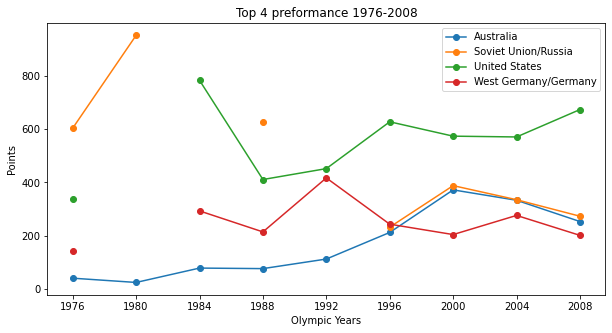

In [12]:
#create a line plot
top_four_points_df.unstack().plot(figsize=(10,5), marker = "o")
#get list of years for x axis
year = top_four["Year"].unique()
plt.xticks(year)
plt.xlabel("Olympic Years")
plt.ylabel("Points")
plt.title("Top 4 preformance 1976-2008")
plt.legend(["Australia","Soviet Union/Russia", "United States", "West Germany/Germany"])
plt.savefig("top_four_preformance.png")
plt.show()



In [13]:
utfp = top_four_points.unstack()
utfp

Country,Australia,Soviet Union/Russia,United States,West Germany/Germany
Year,,,,
1976.0,40.0,604.0,337.0,141.0
1980.0,24.0,953.0,NaN,NaN
1984.0,78.0,NaN,784.0,293.0
1988.0,76.0,627.0,411.0,214.0
1992.0,112.0,NaN,452.0,417.0
1996.0,212.0,232.0,628.0,243.0
2000.0,372.0,388.0,574.0,204.0
2004.0,333.0,335.0,571.0,276.0
2008.0,253.0,273.0,674.0,201.0


In [14]:
#create a DataFrame that contains Year, Points, Country, and Gender
ycpg_df = olympics_data[["Year", "Points", "Country", "Gender"]]
ycpg_df

,Year,Points,Country,Gender
0,1976.0,2.0,East Germany,Women
1,1976.0,1.0,Soviet Union,Men
2,1976.0,3.0,United States,Men
3,1976.0,2.0,Italy,Men
4,1976.0,1.0,United States,Women
...,...,...,...,...
15428,2008.0,1.0,France,Men
15429,2008.0,3.0,Georgia,Men
15430,2008.0,2.0,Azerbaijan,Men
15431,2008.0,3.0,France,Men


In [15]:
#rename Soviet Union and Russia to Soviet Union/Russia
ycpg_df["Country"] = ycpg_df["Country"].replace(["Soviet Union"], "Soviet Union/Russia")
ycpg_df["Country"] = ycpg_df["Country"].replace(["Russia"], "Soviet Union/Russia")
#rename West Germany and Germany to West Germany/Germany
ycpg_df["Country"] = ycpg_df["Country"].replace(["West Germany"], "West Germany/Germany")
ycpg_df["Country"] = ycpg_df["Country"].replace(["Germany"], "West Germany/Germany")

#create a DataFrame containing Top 4
topfourg = ["United States", "Soviet Union/Russia", "West Germany/Germany", "Australia"]
top_fourg = ycpg_df[ycpg_df["Country"].isin(topfour)]
top_fourg

<ipython-input-15-8b1ddd0b5d7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycpg_df["Country"] = ycpg_df["Country"].replace(["Soviet Union"], "Soviet Union/Russia")
<ipython-input-15-8b1ddd0b5d7d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ycpg_df["Country"] = ycpg_df["Country"].replace(["Russia"], "Soviet Union/Russia")
<ipython-input-15-8b1ddd0b5d7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Year,Points,Country,Gender
1,1976.0,1.0,Soviet Union/Russia,Men
2,1976.0,3.0,United States,Men
4,1976.0,1.0,United States,Women
5,1976.0,2.0,United States,Men
6,1976.0,3.0,Soviet Union/Russia,Women
...,...,...,...,...
15413,2008.0,3.0,Soviet Union/Russia,Men
15420,2008.0,1.0,United States,Men
15422,2008.0,3.0,Soviet Union/Russia,Men
15426,2008.0,2.0,West Germany/Germany,Men


In [16]:
#create DataFrames for each gender
top_four_w = top_fourg[top_fourg["Gender"]==("Women")]
top_four_m = top_fourg[top_fourg["Gender"]==("Men")]

In [31]:
#group each DataFrame by Year and Country
top_four_points_w = top_four_w.groupby(["Year","Country"])["Points"].sum()
top_four_points_w_df = pd.DataFrame(top_four_points_w)

top_four_points_m = top_four_m.groupby(["Year","Country"])["Points"].sum()
top_four_points_m_df = pd.DataFrame(top_four_points_m)

print(top_four_points_w_df)
print(top_four_points_m_df)

                             Points
Year   Country                     
1976.0 Soviet Union/Russia    230.0
       United States           90.0
       West Germany/Germany    21.0
1980.0 Australia                4.0
       Soviet Union/Russia    297.0
1984.0 Australia               15.0
       United States          300.0
       West Germany/Germany    86.0
1988.0 Australia               56.0
       Soviet Union/Russia    161.0
       United States          137.0
       West Germany/Germany    46.0
1992.0 Australia               19.0
       United States          184.0
       West Germany/Germany   162.0
1996.0 Australia              124.0
       Soviet Union/Russia     57.0
       United States          347.0
       West Germany/Germany    92.0
2000.0 Australia              193.0
       Soviet Union/Russia    178.0
       United States          290.0
       West Germany/Germany    99.0
2004.0 Australia              130.0
       Soviet Union/Russia    188.0
       United States        

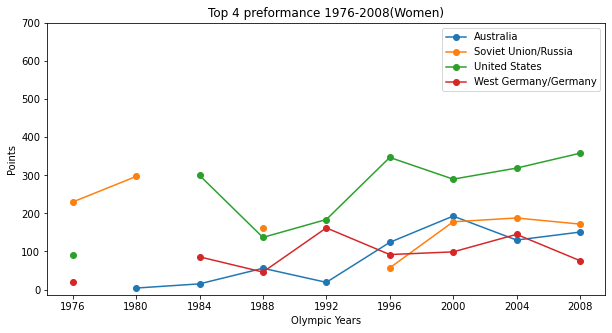

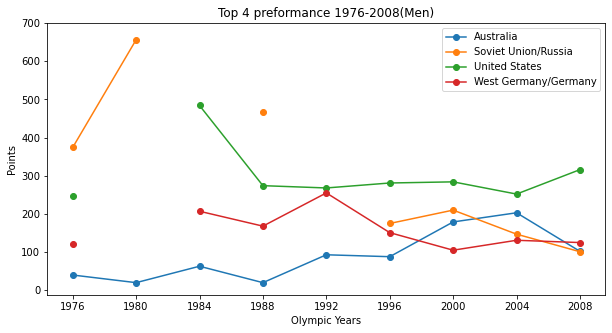

In [25]:
#create a line plot for each DataFrame
top_four_points_w_df.unstack().plot(figsize=(10,5), marker = "o")
#get list of years for x axis
year = top_four["Year"].unique()
ypoint = [0, 100, 200, 300, 400, 500, 600, 700]
plt.xticks(year)
plt.yticks(ypoint)
plt.xlabel("Olympic Years")
plt.ylabel("Points")
plt.title("Top 4 preformance 1976-2008(Women)")
plt.legend(["Australia","Soviet Union/Russia", "United States", "West Germany/Germany"])
plt.savefig("top_four_w_preformance.png")

plt.show()

#create a line plot
top_four_points_m_df.unstack().plot(figsize=(10,5), marker = "o")
#get list of years for x axis
year = top_four["Year"].unique()
plt.xticks(year)
plt.yticks(ypoint)
plt.xlabel("Olympic Years")
plt.ylabel("Points")
plt.title("Top 4 preformance 1976-2008(Men)")
plt.legend(["Australia","Soviet Union/Russia", "United States", "West Germany/Germany"])
plt.savefig("top_four_m_preformance.png")

plt.show()